In [7]:
# Import the course packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.stats

# Import the course datasets as DataFrames
auto = pd.read_csv("../datasets/auto.csv")
boston = pd.read_csv("../datasets/boston.csv")
diabetes = pd.read_csv("../datasets/diabetes.csv")
gapminder = pd.read_csv("../datasets/gm_2008_region.csv")
votes = pd.read_csv("../datasets/votes.csv")
whitewine = pd.read_csv("../datasets/white-wine.csv")

# Preview the first DataFrame
gapminder

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific
...,...,...,...,...,...,...,...,...,...,...
134,3350832.0,2.11,0.5,2.489764,26.39123,15317.0,124.2604,76.0,13.0,America
135,26952719.0,2.46,0.1,4.476669,25.32054,3733.0,124.3462,68.7,49.2,Europe & Central Asia
136,86589342.0,1.86,0.4,1.479347,20.91630,4085.0,121.9367,75.4,26.2,East Asia & Pacific
137,13114579.0,5.88,13.6,0.148982,20.68321,3039.0,132.4493,52.0,94.9,Sub-Saharan Africa


# Preprocessing data

### Exploring categorical features

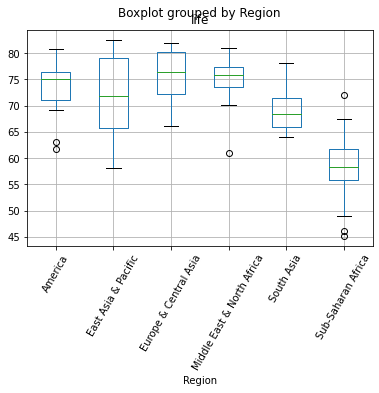

In [5]:
# Import pandas
import pandas as pd

# Read 'gapminder.csv' into a DataFrame: df
df = pd.read_csv("../datasets/gm_2008_region.csv") # changed gapminder.csv to the original dataset.

# Create a boxplot of life expectancy per region
df.boxplot('life', 'Region', rot=60)

# Show the plot
plt.show()


### Creating dummy variables

In [6]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df,drop_first=True)

# Print the new columns of df_region
print(df_region.columns)


Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


### Regression with categorical features

[sklearn.linear_model.Ridge Documentation](https://scikit-learn.org/0.16/modules/generated/sklearn.linear_model.Ridge.html)

[sklearn.model_selection.cross_val_score Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [15]:
X = df['life'].values.reshape(1, -1) # Target
y = df.drop('life', axis=1).values # features

In [16]:
# Import necessary modules
from sklearn.linear_model import Ridge 
from sklearn.model_selection import cross_val_score

# Instantiate a ridge regressor: ridge
ridge = Ridge(normalize=True, alpha=0.5)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(estimator=ridge, X=X, y=y, cv=5)

# Print the cross-validated scores
print(ridge_cv)


ValueError: Found input variables with inconsistent numbers of samples: [1, 139]